In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get the dataset

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2020-06-07 13:45:04--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.69.113, 173.194.69.138, 173.194.69.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.69.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d3vo2prv7c2uo7vcuhb3odpnoe5bmfp/1591537500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-06-07 13:45:04--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d3vo2prv7c2uo7vcuhb3odpnoe5bmfp/1591537500000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125

In [0]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()


# Create a subwords dataset

In [0]:
import tensorflow_datasets as tfds

vocab_size =1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length = 5)

In [5]:
# Check that the tokenizer works appropriately
num = 10
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

And the sound quality is great.
[435, 11, 1, 170, 775, 113, 112, 7, 35, 789]
An
d 
the 
sound
 
quali
ty 
is 
great
.


# Replace sentence data with encoded subwords

In [0]:
for i ,sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [7]:
# Check the sentences are appropriately replaced
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


# Final pre-processing

In [0]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sentences
sentences_padded = pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# Train a Sentiment Model


In [10]:
embedding_dim = 16

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 30

history = model.fit(training_sentences, training_labels_final, epochs= epochs ,validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5191 - val_loss: 0.6951 - val_accuracy: 0.4135
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5424 - val_loss: 0.6964 - val_accuracy: 0.4185
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5424 - val_loss: 0.6936 - val_accuracy: 0.4486
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.6008 - val_loss: 0.6886 - val_accuracy: 0.5113
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6623 - val_loss: 0.6737 - val_accuracy: 0.6216
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.7320 - val_loss: 0.6557 - val_accuracy: 0.6867
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6246 - accuracy: 0.7753 - val_loss: 0.6410 - val_accuracy: 0.6817
Epoch 8/30
50/50 [==

# Visualize the training graph

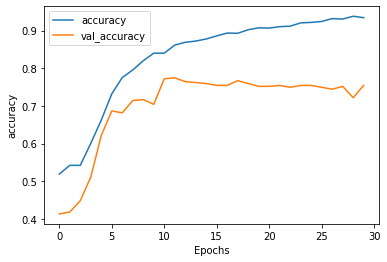

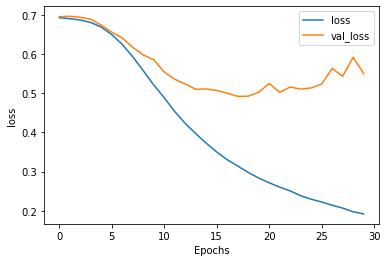

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_{}'.format(string)])
  plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Get files for visualizing the network

In [13]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [0]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
# load the site
# http://projector.tensorflow.org/

# Predicting Sentiment in New Reviews


In [16]:
# # Use the model to predict a review   
# fake_reviews = ['I love this phone', 'I hate spaghetti', 
#                 'Everything was cold',
#                 'Everything was hot exactly as I wanted', 
#                 'Everything was green', 
#                 'the host seated us immediately',
#                 'they gave us free chocolate cake', 
#                 'not sure about the wilted flowers on the table',
#                 'only works when I stand on tippy toes', 
#                 'does not work when I stand on my head']

# print(fake_reviews) 

# # Create the sequences
# padding_type='post'
# sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
# fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

# print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

# classes = model.predict(fakes_padded)

# # The closer the class is to 1, the more positive the review is deemed to be
# for x in range(len(fake_reviews)):
#   print(fake_reviews[x])
#   print(classes[x])
#   print('\n')

# # Try adding reviews of your own
# # Add some negative words (such as "not") to the good reviews and see what happens
# # For example:
# # they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']


AttributeError: ignored